In [1]:
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

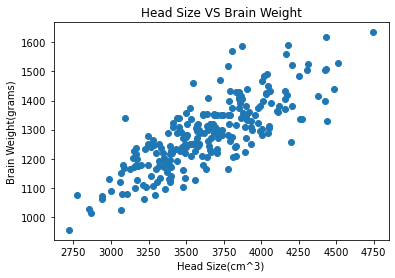

In [2]:
data = pd.read_csv("../BrainSize/homo_sapiens/headbrain.csv")
data.head()

# Visualize data
head = "Head Size(cm^3)"
brain = "Brain Weight(grams)"
plt.scatter(data[head], data[brain])
plt.xlabel(head)
plt.ylabel(brain)
plt.title("Head Size VS Brain Weight")
plt.show()

In [3]:
# Train / test splitting dataset
train, test = train_test_split(data,  test_size = 0.2)

# Converting training data into tensors for Pytorch
X_train = torch.Tensor([[x] for x in list(train[head])])
y_train = torch.torch.FloatTensor([[x] for x in list(train[brain])])

# Converting test data into tensors for Pytorch
X_test = torch.Tensor([[x] for x in list(test[head])])
y_test = torch.torch.FloatTensor([[x] for x in list(test[brain])])

# # create dummy data for training
# x_values = [i for i in range(11)]
# x_train = np.array(x_values, dtype=np.float32)
# x_train = x_train.reshape(-1, 1)

# y_values = [2*i + 1 for i in x_values]
# y_train = np.array(y_values, dtype=np.float32)
# y_train = y_train.reshape(-1, 1)

In [4]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [5]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.1  # / 10**20
epochs = 100

model = linearRegression(inputDim, outputDim)

In [6]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [7]:
epochs_cache = []
losses_cache = []
x_norm = (X_train - X_train.mean()) / X_train.std()

for epoch in range(epochs):
    # Converting inputs and labels to Variable
    inputs = Variable(x_norm)
    labels = Variable(x_norm)

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(x_norm)  # inputs
#     import pdb; pdb.set_trace();
    # get loss for the predicted output
    loss = criterion(outputs, y_train)  # labels
#     print(loss)
    # get gradients w.r.t to parameters
    loss.backward()
    
    # update parameters
    optimizer.step()
    
    epochs_cache.append(epoch)
    losses_cache.append(loss)

for epoch, loss in zip(epochs_cache[-10:], losses_cache[-10:]):
    print('epoch {}, loss {}'.format(epoch, loss))

# for epoch, loss in zip(epochs_cache[:10], losses_cache[:10]):
#     print('epoch {}, loss {}'.format(epoch, loss))

epoch 90, loss 5515.26953125
epoch 91, loss 5515.26953125
epoch 92, loss 5515.26953125
epoch 93, loss 5515.26953125
epoch 94, loss 5515.26953125
epoch 95, loss 5515.26953125
epoch 96, loss 5515.26953125
epoch 97, loss 5515.26953125
epoch 98, loss 5515.26953125
epoch 99, loss 5515.26953125


[[404664.9 ]
 [362767.16]
 [324069.25]
 [384266.  ]
 [328969.  ]
 [373666.56]
 [406564.78]
 [392865.53]
 [300170.56]
 [351867.75]
 [382666.1 ]
 [345568.1 ]
 [380866.2 ]
 [391965.6 ]
 [340668.38]
 [417264.22]
 [384765.97]
 [384466.  ]
 [445462.7 ]
 [370766.75]
 [413364.44]
 [368166.88]
 [404464.9 ]
 [386865.88]
 [401865.06]
 [337268.56]
 [367466.9 ]
 [365667.  ]
 [394265.47]
 [379166.28]
 [273272.03]
 [310770.  ]
 [379166.28]
 [311669.94]
 [317769.6 ]
 [450062.44]
 [341368.3 ]
 [357167.47]
 [318369.56]
 [308370.12]
 [432063.4 ]
 [384665.97]
 [325869.16]
 [439363.03]
 [412664.47]
 [417364.22]
 [394765.44]
 [402465.03]
 [295170.84]
 [356867.5 ]
 [391265.62]
 [310270.  ]
 [334668.7 ]
 [421663.97]
 [399465.2 ]
 [422063.97]
 [315769.72]
 [350967.8 ]
 [317069.66]
 [316869.66]
 [350467.84]
 [333568.75]
 [380566.22]
 [428263.62]
 [380366.22]
 [322669.34]
 [432763.38]
 [294970.84]
 [411564.53]
 [366067.  ]
 [344868.12]
 [421264.  ]
 [301270.5 ]
 [366666.97]
 [278571.72]
 [330968.88]
 [362667.2 ]

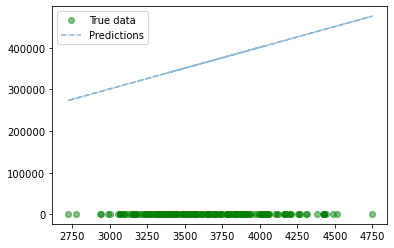

In [8]:
with torch.no_grad(): # we don't need gradients in the testing phase
    predicted = model(Variable(X_train)).data.numpy()
    print(predicted)

plt.clf()
plt.plot(X_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(X_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

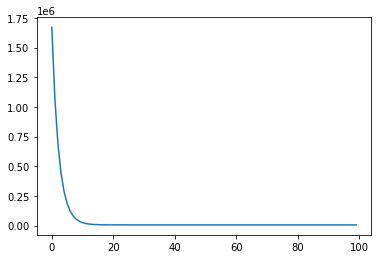

In [9]:
plt.plot(epochs_cache, losses_cache)
plt.show()
plt.close()